In [2]:
import numpy as np
import pandas as pd
import matplotlib

In [3]:
id_dtype = int
species_type = str
data = pd.read_csv('iris_data.csv',dtype={'id': id_dtype,'species': species_type},delimiter=';')
labels = pd.read_csv('iris_labels.csv',dtype={'id': id_dtype,'species': species_type}, delimiter=';')
unseen = pd.read_csv('iris_unseen.csv',delimiter=';')

In [4]:
#1.2 - 1.3 merge two csv into one file and filter out examier attribute

merge = pd.merge(data, labels, on = 'id' )
merge.head
merged = merge.drop(columns=['examiner'])
merged.head

<bound method NDFrame.head of        pl   pw   sl   sw    id          species
0     5.0  3.5  1.3  0.3     1      Iris-setosa
1     4.8  3.0  1.4  0.2     2      Iris-setosa
2     4.7  3.2  1.3  0.2     3      Iris-setosa
3     4.6  3.2  1.5  0.2     4      Iris-setosa
4     4.9  3.4  1.3  0.2     5      Iris-setosa
...   ...  ...  ...  ...   ...              ...
6495  5.9  2.0  3.9  1.0  9963  Iris-versicolor
6496  6.0  2.8  4.3  1.5  9979  Iris-versicolor
6497  5.3  2.3  3.6  1.0  9982  Iris-versicolor
6498  6.0  3.4  4.6  1.7  9986  Iris-versicolor
6499  6.2  2.9  4.6  1.6  9992  Iris-versicolor

[6500 rows x 6 columns]>

In [5]:
#1.4 sort by species attribute

merged_sort = merged.sort_values(by="species")
print(merged_sort)

       pl   pw   sl   sw    id         species
0     5.0  3.5  1.3  0.3     1     Iris-setosa
3542  4.8  2.9  1.3  0.2  5402     Iris-setosa
3543  4.8  3.1  1.1  0.3  5403     Iris-setosa
3544  5.0  3.6  1.3  0.2  5405     Iris-setosa
3545  5.5  3.7  1.7  0.5  5406     Iris-setosa
...   ...  ...  ...  ...   ...             ...
3817  7.3  2.7  6.2  1.9  5831  Iris-virginica
3818  8.0  3.8  6.4  2.1  5832  Iris-virginica
3819  6.4  2.7  5.6  2.3  5833  Iris-virginica
3891  7.1  3.4  6.0  2.4  5960  Iris-virginica
4279  6.4  2.7  5.3  1.9  6562  Iris-virginica

[6500 rows x 6 columns]


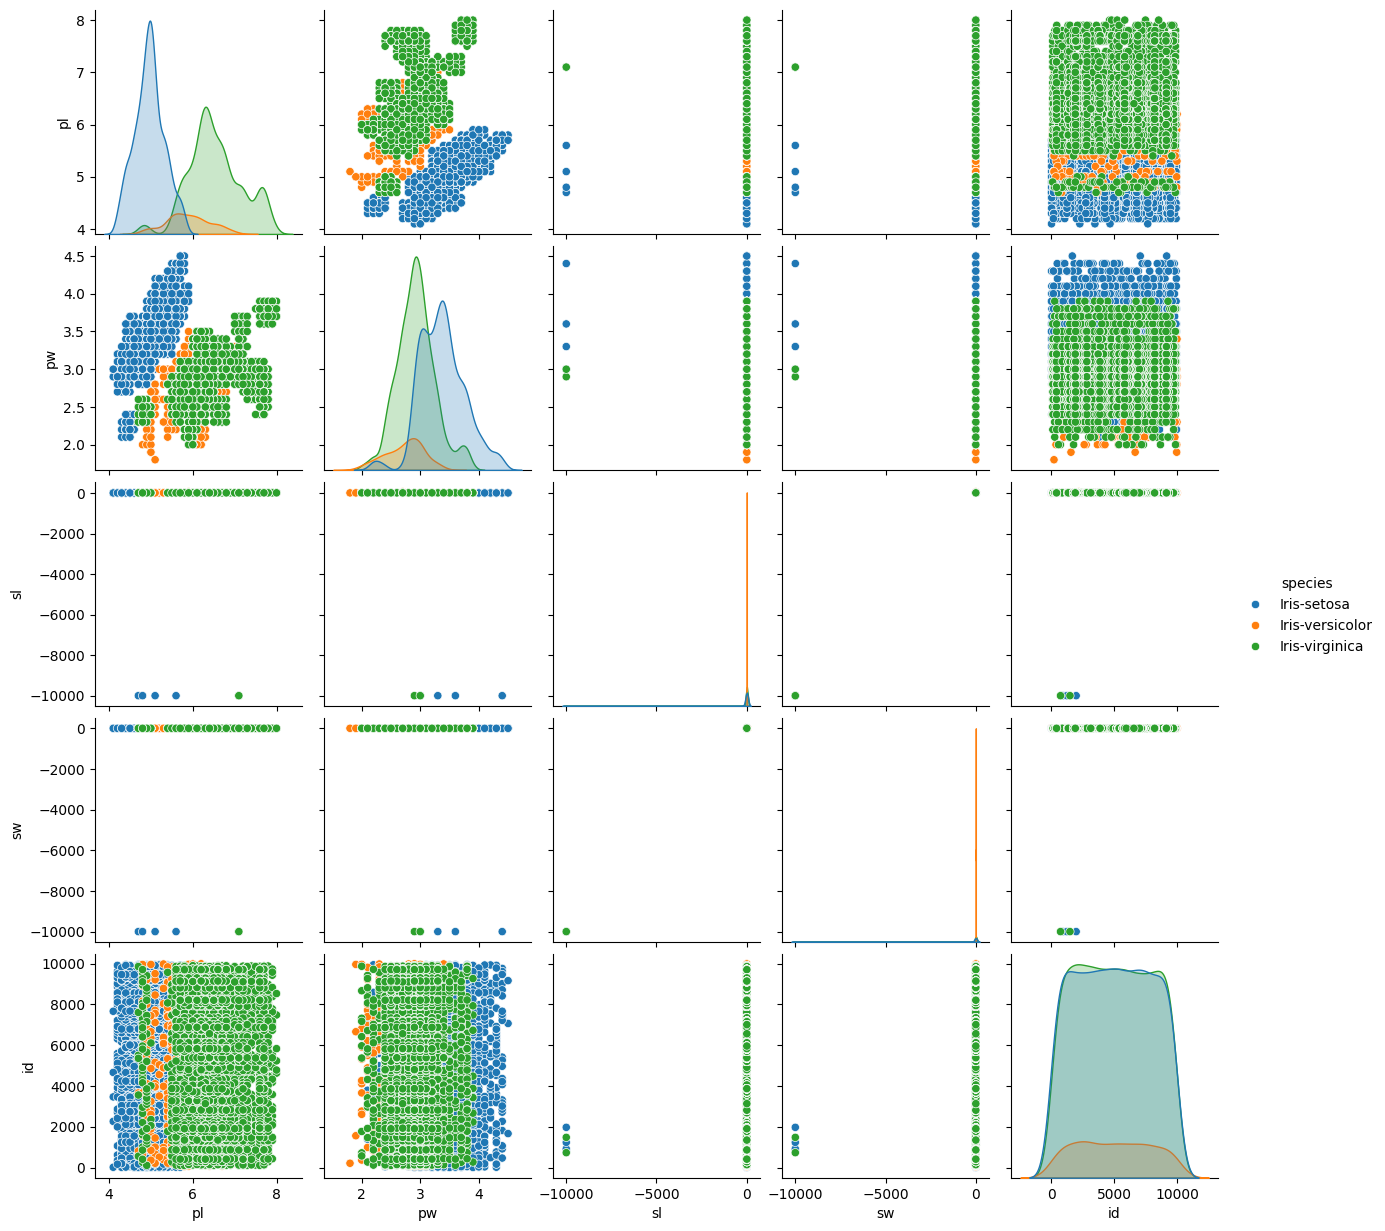

In [6]:
#scatter plot using seaboard package 

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.pairplot(merged_sort, hue = "species")
plt.show()

In [35]:
#2.1 deal with missing value -9999

missing_values_pl = merged_sort[merged_sort["pl"] == -9999]
missing_values_pw = merged_sort[merged_sort["pw"] == -9999]
missing_values_sl = merged_sort[merged_sort["sl"] == -9999]
missing_values_sw = merged_sort[merged_sort["sw"] == -9999]

print(missing_values_pl, missing_values_pw , missing_values_sl, missing_values_sw)

merged_sort_filtered = merged_sort[(merged_sort["pl"] != -9999) & (merged_sort["pw"] != -9999) & (merged_sort["sl"] != -9999) & (merged_sort["sw"] != -9999)]

print(merged_sort_filtered)
print(merged_sort_filtered['species'].value_counts())

Empty DataFrame
Columns: [pl, pw, sl, sw, id, species]
Index: [] Empty DataFrame
Columns: [pl, pw, sl, sw, id, species]
Index: []        pl   pw      sl      sw    id         species
519   4.7  3.3 -9999.0 -9999.0   775     Iris-setosa
611   5.6  4.4 -9999.0 -9999.0   916     Iris-setosa
1303  5.1  3.6 -9999.0 -9999.0  1972     Iris-setosa
821   4.8  3.0 -9999.0 -9999.0  1235     Iris-setosa
476   7.1  2.9 -9999.0 -9999.0   730  Iris-virginica
961   7.1  3.0 -9999.0 -9999.0  1480  Iris-virginica        pl   pw      sl      sw    id         species
519   4.7  3.3 -9999.0 -9999.0   775     Iris-setosa
611   5.6  4.4 -9999.0 -9999.0   916     Iris-setosa
1303  5.1  3.6 -9999.0 -9999.0  1972     Iris-setosa
821   4.8  3.0 -9999.0 -9999.0  1235     Iris-setosa
476   7.1  2.9 -9999.0 -9999.0   730  Iris-virginica
961   7.1  3.0 -9999.0 -9999.0  1480  Iris-virginica
       pl   pw   sl   sw    id         species
0     5.0  3.5  1.3  0.3     1     Iris-setosa
3542  4.8  2.9  1.3  0.2  5402    

In [8]:
#2.2 see and remove outliers

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

numeric_cols = ['pl', 'pw', 'sl', 'sw']
z_scores = stats.zscore(merged_sort_filtered[numeric_cols])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1) #threshold 3, entries (rows) under three std is kept


cleaned  = merged_sort_filtered[filtered_entries]
print(cleaned)

       pl   pw   sl   sw    id         species
0     5.0  3.5  1.3  0.3     1     Iris-setosa
3542  4.8  2.9  1.3  0.2  5402     Iris-setosa
3543  4.8  3.1  1.1  0.3  5403     Iris-setosa
3544  5.0  3.6  1.3  0.2  5405     Iris-setosa
3545  5.5  3.7  1.7  0.5  5406     Iris-setosa
...   ...  ...  ...  ...   ...             ...
3817  7.3  2.7  6.2  1.9  5831  Iris-virginica
3818  8.0  3.8  6.4  2.1  5832  Iris-virginica
3819  6.4  2.7  5.6  2.3  5833  Iris-virginica
3891  7.1  3.4  6.0  2.4  5960  Iris-virginica
4279  6.4  2.7  5.3  1.9  6562  Iris-virginica

[6487 rows x 6 columns]


In [9]:
# task 3

import sys
print(sys.path)


['/usr/local/Cellar/python@3.12/3.12.5/Frameworks/Python.framework/Versions/3.12/lib/python312.zip', '/usr/local/Cellar/python@3.12/3.12.5/Frameworks/Python.framework/Versions/3.12/lib/python3.12', '/usr/local/Cellar/python@3.12/3.12.5/Frameworks/Python.framework/Versions/3.12/lib/python3.12/lib-dynload', '', '/Users/ljy/myenv/lib/python3.12/site-packages']


[[0.23076923 0.64       0.08064516 0.07692308]
 [0.17948718 0.4        0.08064516 0.03846154]
 [0.17948718 0.48       0.0483871  0.07692308]
 ...
 [0.58974359 0.32       0.77419355 0.84615385]
 [0.76923077 0.6        0.83870968 0.88461538]
 [0.58974359 0.32       0.72580645 0.69230769]]
            pl    pw        sl        sw
0     0.230769  0.64  0.080645  0.076923
1     0.179487  0.40  0.080645  0.038462
2     0.179487  0.48  0.048387  0.076923
3     0.230769  0.68  0.080645  0.038462
4     0.358974  0.72  0.145161  0.153846
...        ...   ...       ...       ...
6482  0.820513  0.32  0.870968  0.692308
6483  1.000000  0.76  0.903226  0.769231
6484  0.589744  0.32  0.774194  0.846154
6485  0.769231  0.60  0.838710  0.884615
6486  0.589744  0.32  0.725806  0.692308

[6487 rows x 4 columns]
           PC1       PC2       PC3       PC4         species
0    -0.550332  0.079977 -0.012000 -0.011342     Iris-setosa
1    -0.561036 -0.156217  0.062137 -0.028971     Iris-setosa
2    -0.5681

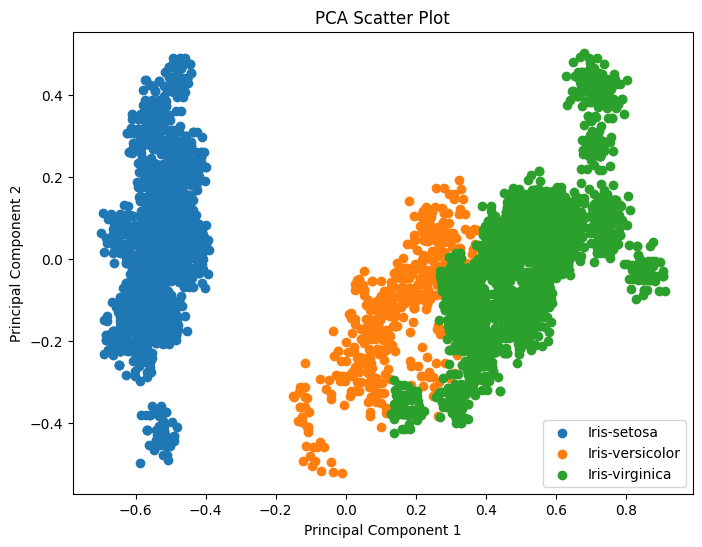

In [10]:
#3.1 normalization

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

numeric_data = cleaned[numeric_cols]
scaled = MinMaxScaler().fit_transform(numeric_data)
print(scaled)
standard_scaled = pd.DataFrame(scaled, columns=numeric_cols) #revert back to table
print(standard_scaled)

#3.2 PCA and scatterplot
pca = PCA(n_components=4)
pca_components = pca.fit_transform(standard_scaled)
pca_table = pd.DataFrame(pca_components, columns=['PC1', 'PC2','PC3', 'PC4'])
pca_table['species'] = cleaned['species'].values
print(pca_table)

plt.figure(figsize=(8, 6))
species_unique = pca_table['species'].unique()

for species in species_unique:
    subset = pca_table[pca_table['species'] == species]
    plt.scatter(subset['PC1'], subset['PC2'], label=species)

plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [11]:
# check contribution of each attributes

pd.DataFrame(pca.components_, columns=["Sepal L", "Sepal W", "Petal L", "PetalW"],index = ['PC 1','PC 2','PC 3','PC 4']).abs().mean(axis = 0)


Sepal L    0.487490
Sepal W    0.406321
Petal L    0.391236
PetalW     0.434407
dtype: float64

In [12]:
# 3.5 check the contribution again, but rescale 'pl' (Petal Length) to the range [0, 100]

cleaned_copy = cleaned.copy()
scaler = MinMaxScaler(feature_range=(0, 100))
cleaned_copy['pl'] = scaler.fit_transform(cleaned_copy[['pl']])

pca = PCA(n_components=4)
pca_components = pca.fit_transform(numeric_data)

pca_35 = pd.DataFrame(pca_components, columns=['PC1', 'PC2','PC3', 'PC4'])
pca_35['species'] = cleaned['species']

print(pca_35)

           PC1       PC2       PC3       PC4      species
0    -2.531158  0.231751  0.054048  0.026270  Iris-setosa
1    -2.591016 -0.308080 -0.276003  0.104155  Iris-setosa
2    -2.741875 -0.148019 -0.094552  0.197416  Iris-setosa
3    -2.575559  0.312839  0.055714 -0.080737  Iris-setosa
4    -1.953414  0.622892  0.050038  0.082878  Iris-setosa
...        ...       ...       ...       ...          ...
6482  3.132927  0.235662 -0.582391 -0.088087  Iris-setosa
6483  3.538837  1.419979 -0.133400 -0.193139  Iris-setosa
6484  2.443977 -0.333765  0.106108  0.150809  Iris-setosa
6485  3.016688  0.552710  0.249985  0.026451  Iris-setosa
6486  2.041230 -0.233265 -0.138122  0.016473  Iris-setosa

[6487 rows x 5 columns]


In [15]:
#3.6 add outliers 

data_with_outlier = merged_sort_filtered.copy()
data_with_outlier.at[0, 'pl'] = 5000

pca_outlier = PCA(n_components=4)
pca_components_outlier = pca_outlier.fit_transform(data_with_outlier[numeric_cols])

pca_outlier_new = pd.DataFrame(pca_components_outlier, columns=['PC1', 'PC2','PC3', 'PC4'])
pca_outlier_new['species'] = data_with_outlier['species']

print(pca_outlier_new)

              PC1       PC2       PC3       PC4          species
0     4993.472071 -2.325768 -0.017091 -0.106683      Iris-setosa
1       -1.727954 -2.414911 -0.125864 -0.415223      Iris-setosa
2       -1.727940 -2.578550  0.061383 -0.247411      Iris-setosa
3       -1.527913 -2.475603 -0.052771  0.278288      Iris-setosa
4       -1.027915 -2.001983  0.086451  0.405970      Iris-setosa
...           ...       ...       ...       ...              ...
6489     0.771952  2.761159 -0.392129 -0.136171      Iris-setosa
6490     1.472012  2.925902 -0.166729  0.964724      Iris-setosa
6491    -0.128040  2.360186  0.199271 -0.233542      Iris-setosa
6492     0.571994  2.705910  0.216540  0.501392  Iris-versicolor
6493    -0.128034  1.932085 -0.058846 -0.243804  Iris-versicolor

[6494 rows x 5 columns]


In [43]:
#4 sampling 

#4.1 sample 150 instances uniformly

import pandas as pd

sampled_data_newonefivezero = cleaned.sample(n=150, random_state=42)

#4.2 use bootstraping

bootstrapped_data = cleaned.sample(n=150, replace=True, random_state=43)

#4.3 stratifie sampling of half instances: samples 50% of the data for each species

newCopy = cleaned.copy()

stratified_sample1 = newCopy.groupby('species', group_keys=False).apply(lambda x: x.sample(frac=0.3, random_state=42), include_groups=False)
stratified_sample1 = stratified_sample1.reset_index(drop=True)

#4.4 
stratified_sample2 = newCopy.groupby('species', group_keys=False).apply(lambda x: x.sample(frac=0.3, random_state=42), include_groups=False)


In [44]:
# 4.3 对每个物种按50%抽样
newCopy = cleaned.copy()

stratified_sample1 = newCopy.groupby('species', group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=42))

# 重置索引，确保 'species' 列仍然存在
stratified_sample1 = stratified_sample1.reset_index(drop=True)

# 检查 'species' 列是否存在
print(stratified_sample1['species'].value_counts())


species
Iris-virginica     1498
Iris-setosa        1496
Iris-versicolor     249
Name: count, dtype: int64


/var/folders/n8/3b58tsrs01q7qhmbflf30k780000gp/T/ipykernel_17669/4095080338.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample1 = newCopy.groupby('species', group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=42))


In [48]:
##to answer the question in the form

# 查看 4.1 随机均匀采样后的物种数量分布
print(sampled_data_newonefivezero['species'].value_counts())

# 查看 4.2 自举法采样后的物种数量分布
print(bootstrapped_data['species'].value_counts())

# 查看 4.3 分层采样后的物种数量分布
print(stratified_sample1['species'].value_counts())

# 查看 4.4 分层采样后的物种数量分布
print(stratified_sample2['species'].value_counts())


print("Repeated identifiers in bootstrapping:")
print(bootstrapped_data.duplicated().sum())  # Count how many repeated rows


# Example with different random seeds
simple_sample_seed1 = cleaned.sample(n=150, random_state=1)
simple_sample_seed2 = cleaned.sample(n=150, random_state=2)

bootstrapped_sample_seed1 = cleaned.sample(n=150, replace=True, random_state=1)
bootstrapped_sample_seed2 = cleaned.sample(n=150, replace=True, random_state=2)

print("Simple sampling with random_state=1:", simple_sample_seed1['species'].value_counts())
print("Simple sampling with random_state=2:", simple_sample_seed2['species'].value_counts())

print("Bootstrapping with random_state=1:", bootstrapped_sample_seed1['species'].value_counts())
print("Bootstrapping with random_state=2:", bootstrapped_sample_seed2['species'].value_counts())


species
Iris-virginica     65
Iris-setosa        64
Iris-versicolor    21
Name: count, dtype: int64
species
Iris-virginica     76
Iris-setosa        67
Iris-versicolor     7
Name: count, dtype: int64
species
Iris-virginica     1498
Iris-setosa        1496
Iris-versicolor     249
Name: count, dtype: int64
species
Iris-virginica     899
Iris-setosa        898
Iris-versicolor    149
Name: count, dtype: int64
Repeated identifiers in bootstrapping:
3
Simple sampling with random_state=1: species
Iris-virginica     87
Iris-setosa        54
Iris-versicolor     9
Name: count, dtype: int64
Simple sampling with random_state=2: species
Iris-virginica     73
Iris-setosa        69
Iris-versicolor     8
Name: count, dtype: int64
Bootstrapping with random_state=1: species
Iris-setosa        77
Iris-virginica     60
Iris-versicolor    13
Name: count, dtype: int64
Bootstrapping with random_state=2: species
Iris-virginica     73
Iris-setosa        67
Iris-versicolor    10
Name: count, dtype: int64


In [46]:
# 4.4 对每个物种按30%抽样
stratified_sample2 = newCopy.groupby('species', group_keys=False).apply(lambda x: x.sample(frac=0.3, random_state=42))

# 重置索引，确保 'species' 列仍然存在
stratified_sample2 = stratified_sample2.reset_index(drop=True)

# 检查 'species' 列是否存在
print(stratified_sample2['species'].value_counts())


species
Iris-virginica     899
Iris-setosa        898
Iris-versicolor    149
Name: count, dtype: int64


/var/folders/n8/3b58tsrs01q7qhmbflf30k780000gp/T/ipykernel_17669/4268997257.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample2 = newCopy.groupby('species', group_keys=False).apply(lambda x: x.sample(frac=0.3, random_state=42))
